In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Just for the sake of the presentation
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df = pd.read_csv("../../dane.csv")

In [3]:
df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [4]:
df.shape

(8693, 14)

<h1 style="font-weight: bold; font-size: 2rem;">Data Description</h1>

<p>
PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.

HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.

CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.

Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

Destination - The planet the passenger will be debarking to.

Age - The age of the passenger.

VIP - Whether the passenger has paid for special VIP service during the voyage.

RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.

Name - The first and last names of the passenger.

Transported - Whether the passenger was transported to another dimension. This is the target, the column you want to predict if you decide to create a machine learning model.
</p>

<h1 style="font-weight: bold; font-size: 2rem;">Datatable Overview</h1>

In [5]:
df.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [6]:
# Basic info about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


<p>
As we can see, there are some empty values in the dataframe.
Let's see what we can do about it!
</p>

In [7]:
# The table below shows how many values are null
empty_values_info = df.isnull().sum()
print(empty_values_info)

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64


In [8]:
# Deleting rows with all empty values
df = df.dropna(how="all")

In [9]:
empty_values_after = df.isnull().sum()
print(empty_values_after)

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64


In [10]:
# Checking for duplicated rows
duplicate_rows = df[df.duplicated()]

print("Duplicated Rows:")
print(duplicate_rows)

Duplicated Rows:
Empty DataFrame
Columns: [PassengerId, HomePlanet, CryoSleep, Cabin, Destination, Age, VIP, RoomService, FoodCourt, ShoppingMall, Spa, VRDeck, Name, Transported]
Index: []


In [11]:
# Calculating the sum of rows with any missing values
missing_values = df[df.isnull().any(axis=1)]
rows_with_missing_values = len(missing_values)

# Printing the sum of rows with missing values
print("Total number of rows with missing values: ", rows_with_missing_values)

Total number of rows with missing values:  2087


<p>Don't know what can I do with null values sadly</p>

In [12]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


<h1 style="font-weight: bold; font-size: 2rem;">Age Correlations</h1>

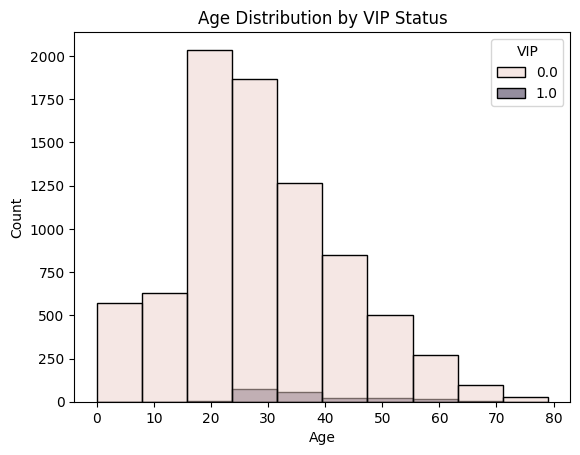

In [13]:
sns.histplot(data=df, x='Age', hue='VIP', bins=10)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution by VIP Status')
plt.show()

<p>
As we can see there is a very small amount of VIPs onboard, from which most of them are middle-aged,
with the highest amount of them being in their 30s. 
</p>

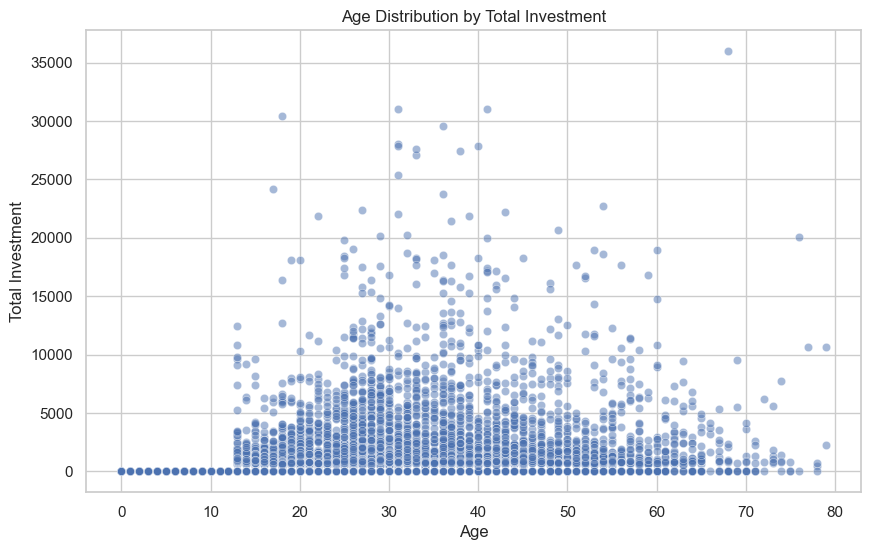

count     7785.000000
mean      1484.601541
std       2845.288241
min          0.000000
25%          0.000000
50%        736.000000
75%       1486.000000
max      35987.000000
Name: TotalInvestment, dtype: float64

In [14]:
# Adding a column that displays the sum of money individuals have spent on the ship's attractions
df['TotalInvestment'] = df['RoomService'] + df['FoodCourt'] + df['ShoppingMall'] + df['Spa'] + df['VRDeck']

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))

sns.scatterplot(x='Age', y='TotalInvestment', data=df, alpha=0.5)

plt.title('Age Distribution by Total Investment')
plt.xlabel('Age')
plt.ylabel('Total Investment')

plt.show()

# Info regarding total investments
df['TotalInvestment'].describe()

<p>
As we can see the 'TotalInvestment' data from 7,785 records displays considerable variability, with an average investment of approximately 1,485 and a high standard deviation (STD) of 2,845. A big portion of individuals have not invested at all or made low investments (25th and 50th percentile values at zero and 736), while others have invested considerably more (75th percentile at 1,486, with a maximum of 35,987).
The scatterplot shows considerable variety in investors' age, with the biggest density between around 20 - 40 age marks.
</p>

<h1 style="font-weight: bold; font-size: 2rem;">Money Spent On Attractions</h1>

c:\Users\rydzs\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
c:\Users\rydzs\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\nanfunctions.py:1384: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(
c:\Users\rydzs\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
c:\Users\rydzs\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\nanfunctions.py:1384: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(
c:\Users\rydzs\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
c:\Users\rydzs\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\nanfunctions.p

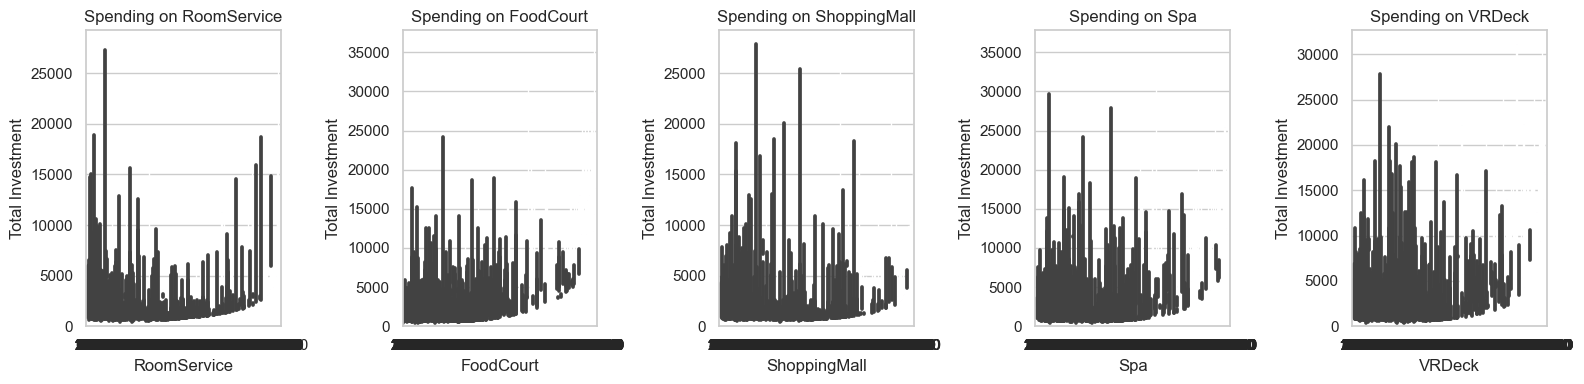

In [15]:
attractions = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

fig, axes = plt.subplots(1, len(attractions), figsize=(16, 4))

for i, attraction in enumerate(attractions):
    
    sns.barplot(x=attraction, y='TotalInvestment', data=df, ax=axes[i])
    
    axes[i].set_title(f'Spending on {attraction}')
    axes[i].set_xlabel(attraction)
    axes[i].set_ylabel('Total Investment')

plt.tight_layout()
plt.show()

<h1 style="font-weight: bold; font-size: 2rem;">Home Planet Correlations</h1>

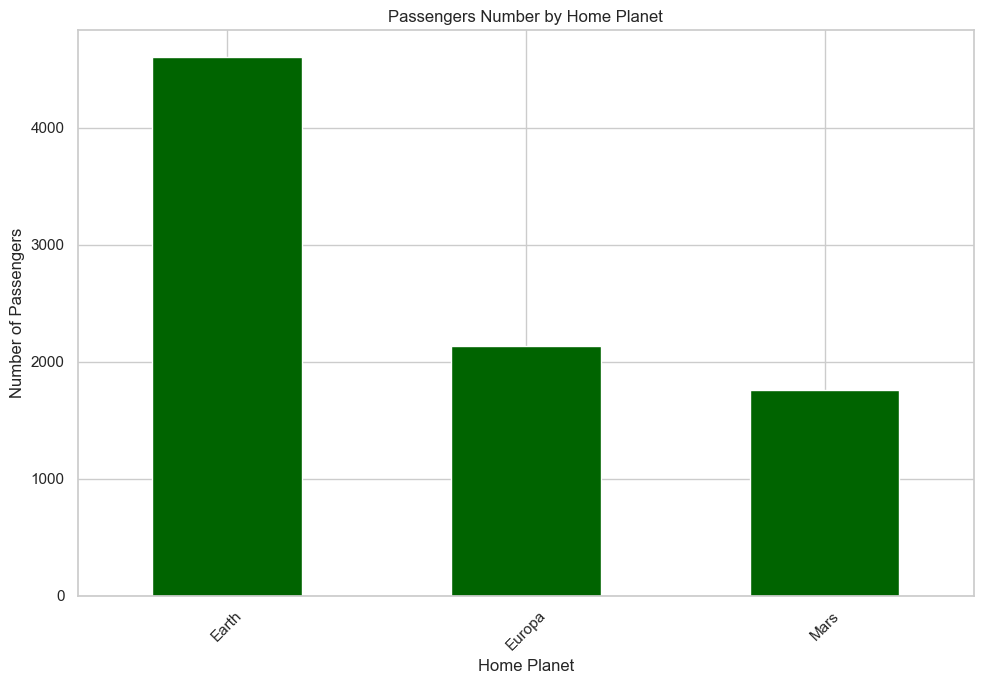

In [16]:
home_planet_counts = df['HomePlanet'].value_counts()

plt.figure(figsize=(10, 7))
home_planet_counts.plot(kind='bar', color='darkgreen')
plt.title('Passengers Number by Home Planet')
plt.xlabel('Home Planet')
plt.ylabel('Number of Passengers')

plt.xticks(rotation=45)

plt.tight_layout()

plt.show()

<p>
    The biggest amount of passengers are from planet Earth, followed by Europa and Mars, where the difference between the first one and the other two is quite substancial.
</p>

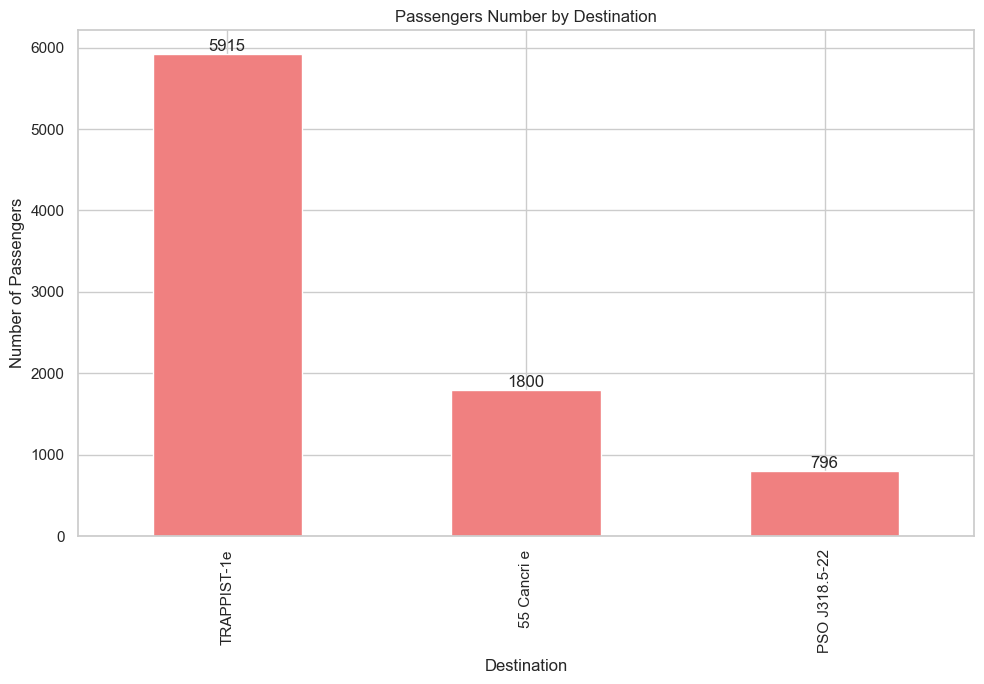

In [17]:
destination_counts = df['Destination'].value_counts()

plt.figure(figsize=(10, 7))
plt.title('Passengers Number by Destination')
plt.xlabel('Destination')
plt.ylabel('Number of Passengers')

# Adding text labels with numbers to the bars
ax = destination_counts.plot(kind='bar', color='lightcoral')
for i, v in enumerate(destination_counts):
    ax.text(i, v, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

<p>
    The biggest amount of passengers are heading towards 'TRAPPIST-1e', followed by '55 Cancri e' and 'PSO J318-5-22', 
    where the difference between the first one and the other two is even more substancial in comparison to the previous chart.
</p>

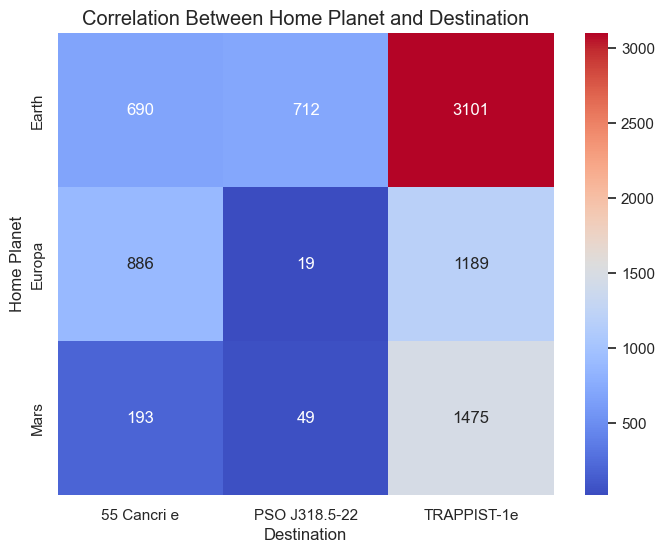

In [18]:
# Let's see how 'Home Planet' and 'Destination' correlate with each other
correlation_data = pd.crosstab(df['HomePlanet'], df['Destination'])

plt.figure(figsize=(8, 6))

sns.heatmap(data=correlation_data, annot=True, fmt='d', cmap='coolwarm')
sns.set(font_scale=1.2)

plt.title('Correlation Between Home Planet and Destination')
plt.xlabel('Destination')
plt.ylabel('Home Planet')

plt.show()

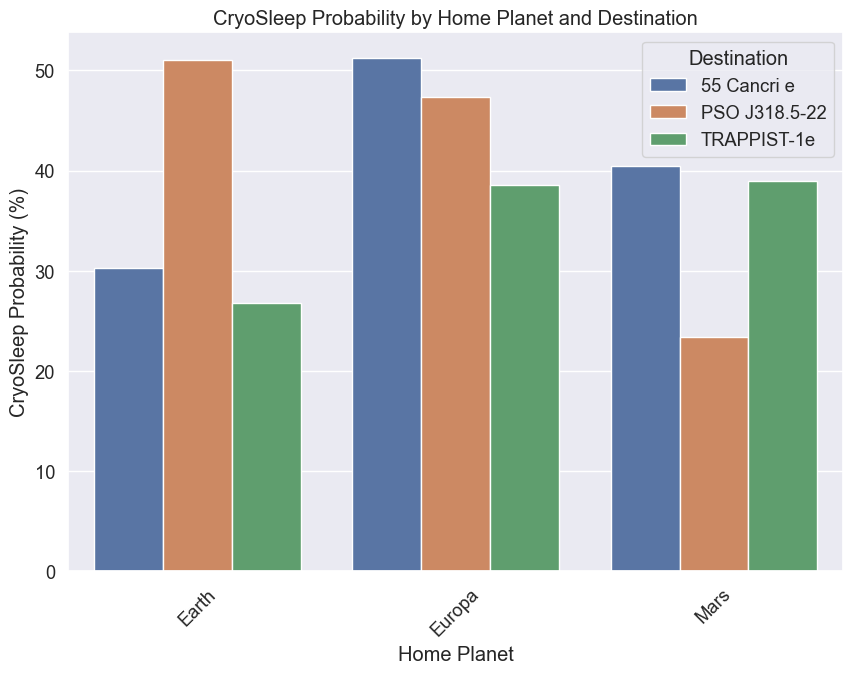

In [19]:
cryo_probability = df.groupby(['HomePlanet', 'Destination'])['CryoSleep'].mean().reset_index()

cryo_probability['CryoSleep'] = (cryo_probability['CryoSleep'] * 100)

plt.figure(figsize=(10, 7))

sns.barplot(data=cryo_probability, x='HomePlanet', y='CryoSleep', hue='Destination')

plt.xlabel('Home Planet')
plt.ylabel('CryoSleep Probability (%)')
plt.title('CryoSleep Probability by Home Planet and Destination')

plt.xticks(rotation=45)

plt.show()

<h1 style="font-weight: bold; font-size: 2rem;">Passengers' IDs In Depth</h1>

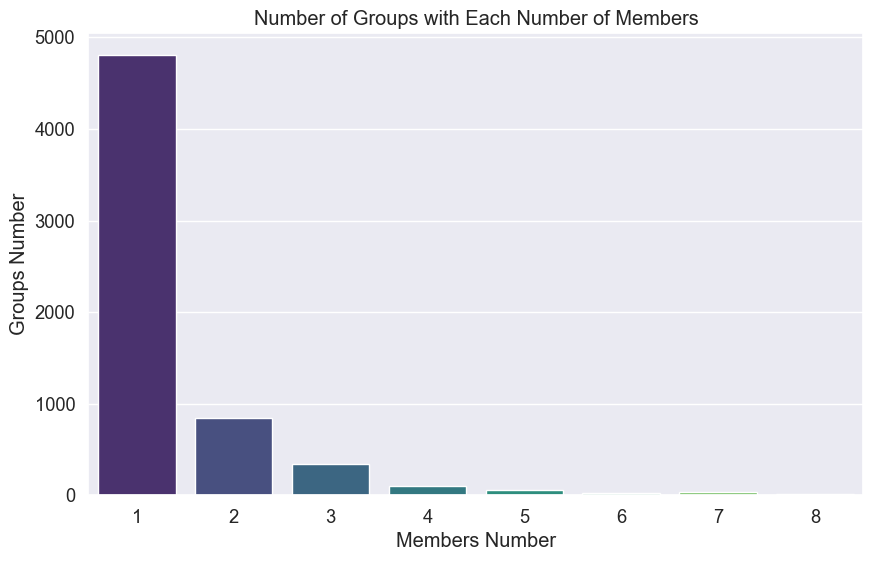

   Members Number  Groups Number
0               1           4805
1               2            841
2               3            340
3               4            103
4               5             53
5               7             33
6               6             29
7               8             13


In [20]:
df['GroupsNumber'] = df['PassengerId'].str.extract(r'(\d+)_\d+')

group_counts = df['GroupsNumber'].value_counts().reset_index()
group_counts.columns = ['GroupsNumber', 'Members Number']

groups_info = group_counts['Members Number'].value_counts().reset_index()
groups_info.columns = ['Members Number', 'Groups Number']

#Putting it into a plot
plt.figure(figsize=(10, 6))

sns.barplot(data=groups_info, x='Members Number', y='Groups Number', palette="viridis")

plt.title('Number of Groups with Each Number of Members')
plt.xlabel('Members Number')
plt.ylabel('Groups Number')

plt.show()

print(groups_info)


<h1 style="font-weight: bold; font-size: 2rem;">Cabin Correlations</h1>

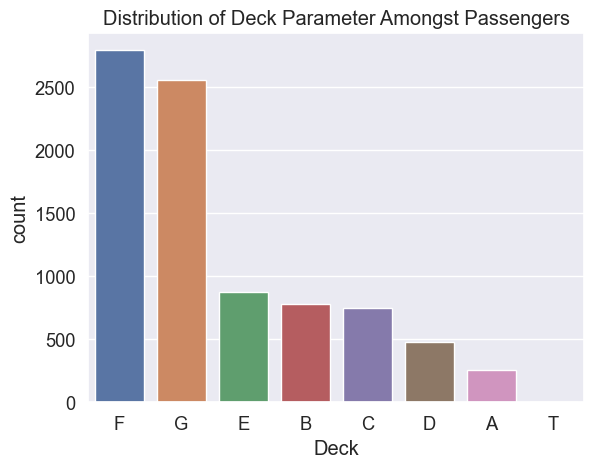

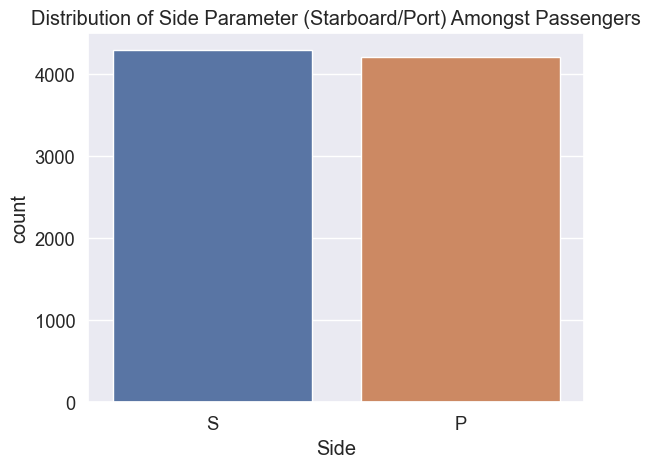

Number of cabins based on (num): 1817
count    1817.000000
mean        4.674739
std         3.965766
min         1.000000
25%         2.000000
50%         3.000000
75%         6.000000
max        28.000000
Name: Passenger Count, dtype: float64
Missing Cabin Values: 199


In [21]:
# 1. Analyzing the Cabin's Deck Parameter
df['Deck'] = df['Cabin'].str.extract(r'([A-Z])')
deck_counts = df['Deck'].value_counts()
sns.countplot(data=df, x='Deck', order=deck_counts.index)
plt.title('Distribution of Deck Parameter Amongst Passengers')
plt.show()

# 2. Analyzing passengers' cabins' Side (Starboard/Port)
df['Side'] = df['Cabin'].str.extract(r'([SP])')
side_counts = df['Side'].value_counts()

sns.countplot(data=df, x='Side', order=side_counts.index)

plt.title('Distribution of Side Parameter (Starboard/Port) Amongst Passengers')
plt.show()

# 3. Analyzing the Number Information
df['Number'] = df['Cabin'].str.extract(r'/(\d+)/').astype(float)

# Calculate the number of members per unique 'num' in the 'Cabin' column
num_counts = df['Number'].value_counts().reset_index()
num_counts.columns = ['Cabin Number (num)', 'Passenger Count']

# Approximate members per 'num' - cabin number
print("Number of cabins based on (num):", len(num_counts))
print(num_counts['Passenger Count'].describe())

# 4. Determining Missing Values
missing_cabin_count = df['Cabin'].isna().sum()
print(f'Missing Cabin Values: {missing_cabin_count}')

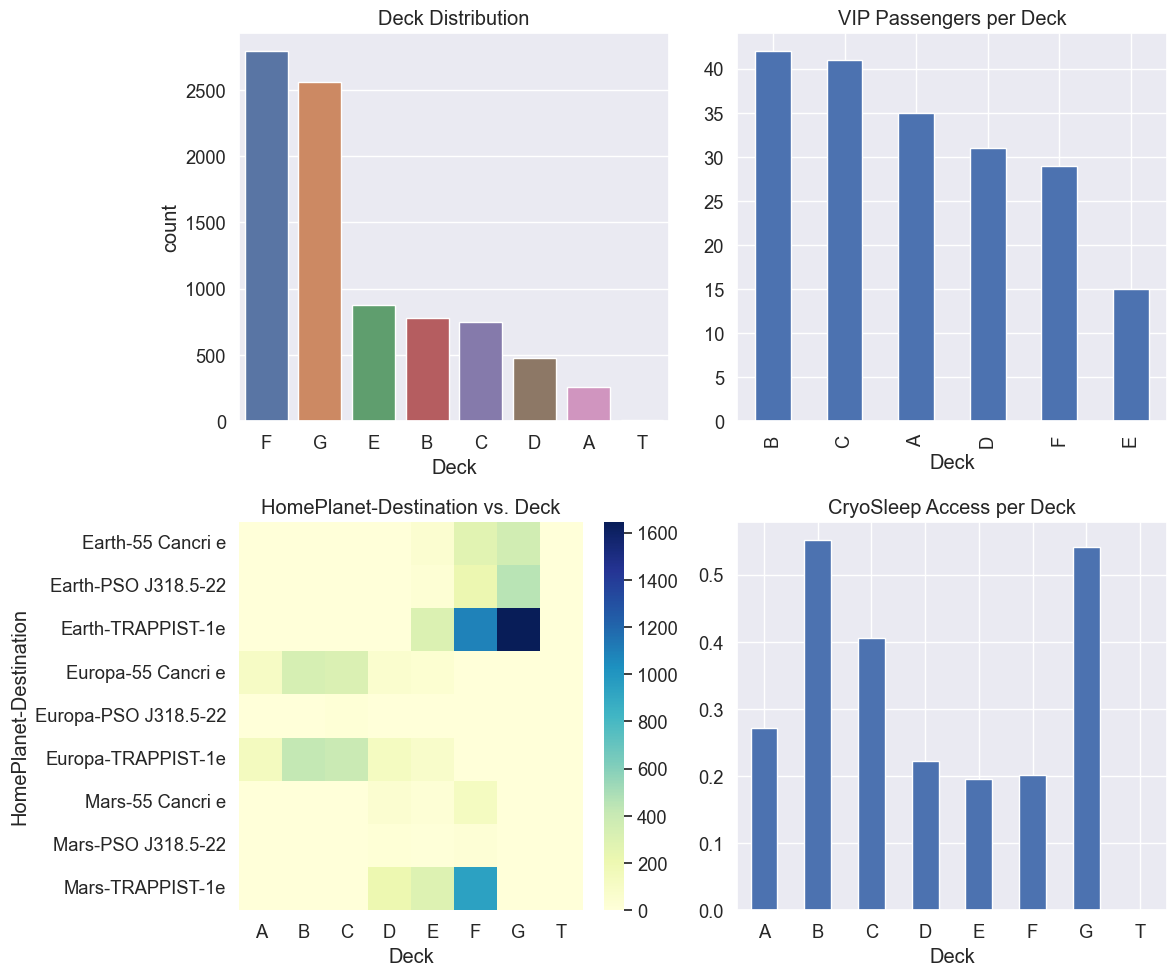

C:\Users\rydzs\AppData\Local\Temp\ipykernel_20228\3719057272.py:49: UserWarning: The palette list has more values (9) than needed (8), which may not be intended.
  sns.scatterplot(x='Deck', y='TotalInvestment', data=df, hue='Deck', palette=palette, alpha=0.7, s=100)


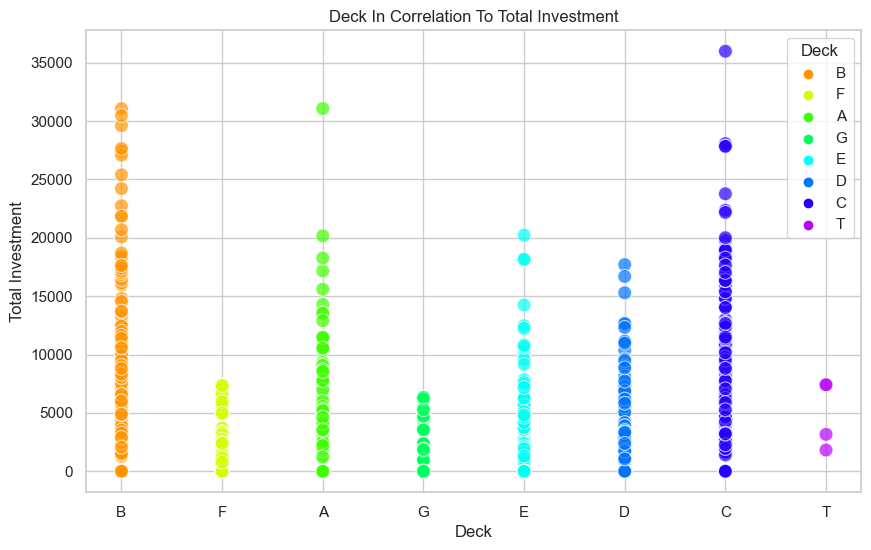

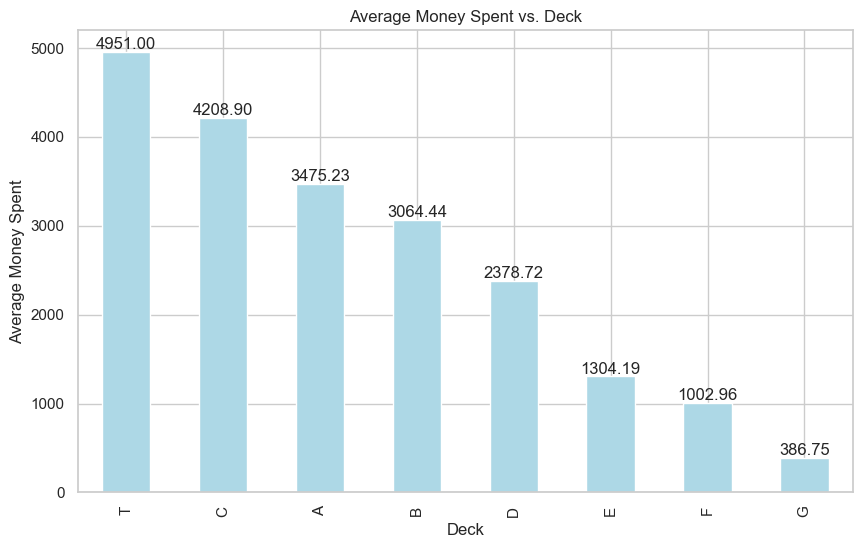

In [22]:
# 1. Extracting Deck Information
df['Deck'] = df['Cabin'].str.extract(r'([A-Z])')
deck_counts = df['Deck'].value_counts()

# 2. Analyzing 'VIP' Column
vip_deck_counts = df[df['VIP'] == 1]['Deck'].value_counts()

# 3. Analyzing 'HomePlanet' and 'Destination'
# Creating a pivot table to see if certain combinations of 'HomePlanet' and 'Destination' relate to 'Deck'
home_destination_deck = df.pivot_table(index=['HomePlanet', 'Destination'], columns='Deck', aggfunc='size', fill_value=0)

# 4. Analyze 'CryoSleep'
# Calculate the percentage of passengers with CryoSleep access for each deck
cryo_deck_prob = df.groupby('Deck')['CryoSleep'].mean()

# Visualization of results
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Deck Distribution
sns.countplot(data=df, x='Deck', order=deck_counts.index, ax=axes[0, 0])
axes[0, 0].set_title('Deck Distribution')

# VIP Passengers per Deck
vip_deck_counts.plot(kind='bar', ax=axes[0, 1])
axes[0, 1].set_title('VIP Passengers per Deck')
plt.xticks(rotation=0)

# HomePlanet-Destination vs. Deck
sns.heatmap(home_destination_deck, cmap='YlGnBu', ax=axes[1, 0])
axes[1, 0].set_title('HomePlanet-Destination vs. Deck')

# CryoSleep Access per Deck
cryo_deck_prob.plot(kind='bar', ax=axes[1, 1])
axes[1, 1].set_title('CryoSleep Access per Deck')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()



# Creating a scatterplot to visualize the correlation between 'Deck' and 'TotalInvestment'
plt.figure(figsize=(10, 6))

sns.set(style="whitegrid")

palette = sns.color_palette("hsv", len(df['Deck'].unique()))

sns.scatterplot(x='Deck', y='TotalInvestment', data=df, hue='Deck', palette=palette, alpha=0.7, s=100)

plt.title('Deck In Correlation To Total Investment')
plt.xlabel('Deck')
plt.ylabel('Total Investment')

plt.show()

# Calculating the average money spent in different decks
average_investment_by_deck = df.groupby('Deck')['TotalInvestment'].mean().sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 6))

average_investment_by_deck.plot(kind='bar', color='lightblue')

plt.title('Average Money Spent vs. Deck')

plt.xlabel('Deck')
plt.ylabel('Average Money Spent')

for i, v in enumerate(average_investment_by_deck):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom')

plt.show()

<p>
1. From the data above can be concluded that the are 8 different decks, from which the most populated ones are, in descending order:
    <br>
    -deck F
    <br>
    -deck G
<br>
<br>
Decks E and below are far from being as populated as the two mentioned above.
<br>
<br>
2. Most VIPs reside in decks B, C and A, that are in the top 4 decks in terms of money spent by their passengers.
<br>
<br>
3. "HomePlanet-Destination vs. Deck" plot shows that the highest amount of passengers, that have departured from Earth and are heading towards TRAPPIST-1e, reside on deck G followed closely by deck F.
</p>